# Model `SimpleThreshold` + `BinaryMFThreshold`

The initial factorization `U` and `V` are from NMF, and the initial guessing of optimal thresholds `u` and `v` are from the grid search in `SimpleThreshold`.

In [1]:
# use project files rather than the installed PyBMF

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

In [2]:
# # generating synthetic data

# from PyBMF.generators import BlockDiagonalMatrixGenerator

# data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.2])
# data.generate(seed=1000)
# data.add_noise(noise=[0.4, 0.1], seed=2000)

# data.show_matrix(scaling=0.5)

/Users/felixnie/miniconda3/envs/pybmf/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/felixnie/MEGA/PyBMF/examples/../PyBMF/datasets/BaseData.py:101: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(handle)


[I] Found settings.ini at /Users/felixnie/MEGA/PyBMF/examples/settings.ini
[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


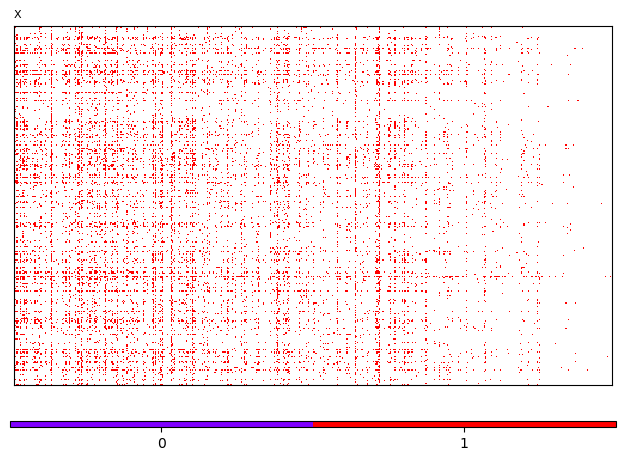

<Figure size 640x480 with 0 Axes>

In [3]:
# loading real-world data

from PyBMF.datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

data.show_matrix(scaling=0.5)

In [4]:
# splitting the data into train, validation and test

from PyBMF.datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)

# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')
split.negative_sample(
    size=split.pos_size, 
    seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1722758982
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1722758982
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 139246
[I]   n_negatives  : 10754
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 2023


In [5]:
# shared parameters

k = 20
W = 'full'
max_iter = 1000

# Init `U`, `V` with NMF

There is no point to init `U`, `V` with `BinaryMFPenalty` (e.g., `NMFSklearn` followed by `BinaryMFPenalty` and then `BinaryMFThreshold`), as the factors are already (near) binary. It's meaningful when the factors are poorly binarized, like in `FastStep`.

[I] k            : 20
[I] U            : None
[I] V            : None
[I] beta_loss    : frobenius
[I] init_method  : nndsvd
[I] solver       : cd
[I] tol          : 0.0001
[I] max_iter     : 1000
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] save_model   : False
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-04 16-09-42-226325 NMFSklearn
[I] U, V existed. Skipping initialization.
[I] time elapsed :  0s


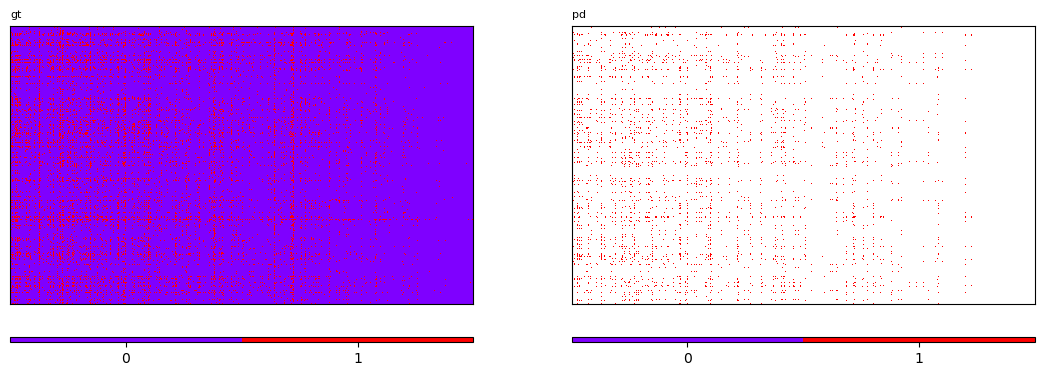

<Figure size 640x480 with 0 Axes>

In [6]:
from PyBMF.models import NMFSklearn, WNMF
from PyBMF.utils import show_factor_distribution

model_nmf = NMFSklearn(k=k, init_method='nndsvd', max_iter=max_iter, seed=2024)
model_nmf.fit(X_train=X_train, save_model=False)

# model_nmf = WNMF(k=k, W=W, beta_loss='frobenius', init_method='normal', max_iter=1000, seed=2024)
# model_nmf.fit(X_train=X_train, task='reconstruction', verbose=False, display=False, show_logs=False, show_result=True, save_model=False)

0 - [0.000, 0.642], [0.000, 1.506]
1 - [0.000, 0.671], [0.000, 1.782]
2 - [0.000, 1.169], [0.000, 1.189]
3 - [0.000, 1.082], [0.000, 1.458]
4 - [0.000, 0.536], [0.000, 2.318]
5 - [0.000, 0.798], [0.000, 1.439]
6 - [0.000, 1.430], [0.000, 0.854]
7 - [0.000, 0.825], [0.000, 1.391]
8 - [0.000, 1.576], [0.000, 0.874]
9 - [0.000, 0.727], [0.000, 1.780]
10 - [0.000, 3.676], [0.000, 0.328]
11 - [0.000, 1.144], [0.000, 1.080]
12 - [0.000, 1.005], [0.000, 1.506]
13 - [0.000, 3.892], [0.000, 0.309]
14 - [0.000, 0.749], [0.000, 1.574]
15 - [0.000, 1.777], [0.000, 1.026]
16 - [0.000, 1.831], [0.000, 0.749]
17 - [0.000, 0.913], [0.000, 1.528]
18 - [0.000, 1.329], [0.000, 0.741]
19 - [0.000, 0.762], [0.000, 1.501]


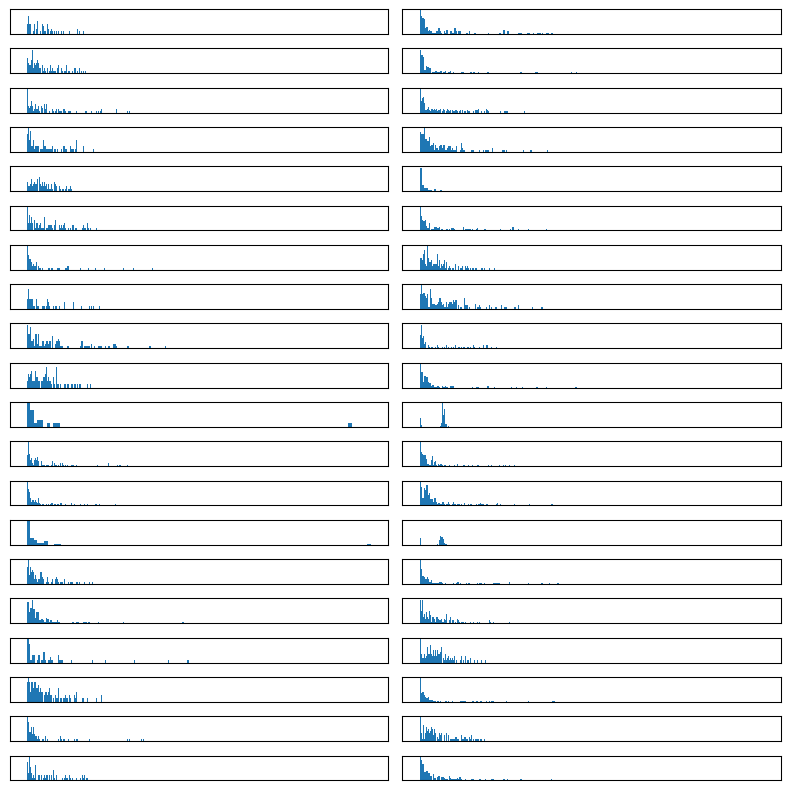

In [7]:
# the distribution of the factor matrices

show_factor_distribution(model_nmf.U, model_nmf.V, resolution=100, show_minmax=True, show_hist=True, remove_below=1e-5)

# Init `u`, `v` with `SimpleThreshold`

[I] U            : (300, 20)
[I] V            : (500, 20)
[I] W            : full
[I] columnwise   : False
[I] randomize    : False
[I] n_grid       : 40
[I] n_trials     : 100
[I] normalize_method : None
[I] solver       : grid-search
[I] init_method  : custom
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] show_logs    : False
[I] save_model   : False
[I] show_result  : True
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-04 16-09-49-340017 SimpleThreshold
[I] Search for u, v using grid search with 1600 trials in total.


[I] Trial: 1599 / 1600: 100%|██████████| 1600/1600 [00:29<00:00, 55.57it/s]/Users/felixnie/MEGA/PyBMF/examples/../PyBMF/models/SimpleThreshold.py:156: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.u = self.logs['updates'].iloc[best_idx][2]
/Users/felixnie/MEGA/PyBMF/examples/../PyBMF/models/SimpleThreshold.py:157: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.v = self.logs['updates'].iloc[best_idx][3]


train                      \
                                                       0                       
                  time iter         u         v   Recall Precision  Accuracy   
125  04/08/24 04:09:52  126  0.299381  0.297139  0.63502  0.541812  0.935333   

               
               
           F1  
125  0.584725

/Users/felixnie/MEGA/PyBMF/examples/../PyBMF/models/SimpleThreshold.py:156: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.u = self.logs['updates'].iloc[best_idx][2]
/Users/felixnie/MEGA/PyBMF/examples/../PyBMF/models/SimpleThreshold.py:157: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.v = self.logs['updates'].iloc[best_idx][3]


train                      \
                                                        0                       
                  time iter         u         v    Recall Precision  Accuracy   
129  04/08/24 04:09:52  130  0.299381  0.534851  0.433885  0.684365  0.945067   

               
               
           F1  
129  0.531072

[I] Trial: 1599 / 1600: 100%|██████████| 1600/1600 [00:29<00:00, 53.35it/s]


[I] time elapsed :  30s


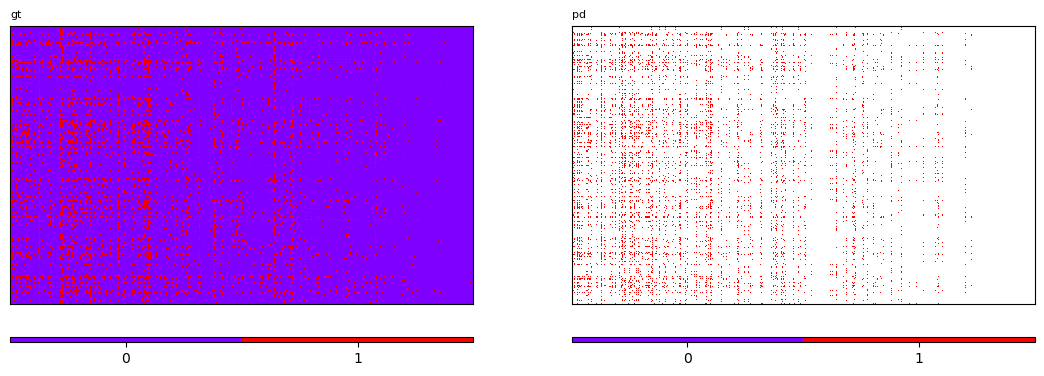

<Figure size 640x480 with 0 Axes>

In [8]:
from PyBMF.models.SimpleThreshold import SimpleThreshold

U, V = model_nmf.U.copy(), model_nmf.V.copy()

model_st = SimpleThreshold(U=U, V=V, columnwise=False, randomize=False, n_grid=40, seed=2024)
model_st.fit(X_train=X_train, X_val=None, X_test=None, task='reconstruction', verbose=False, display=False, show_logs=False, show_result=True, save_model=False)

0 - [0.000, 0.642], [0.000, 1.506]
1 - [0.000, 0.671], [0.000, 1.782]
2 - [0.000, 1.169], [0.000, 1.189]
3 - [0.000, 1.082], [0.000, 1.458]
4 - [0.000, 0.536], [0.000, 2.318]
5 - [0.000, 0.798], [0.000, 1.439]
6 - [0.000, 1.430], [0.000, 0.854]
7 - [0.000, 0.825], [0.000, 1.391]
8 - [0.000, 1.576], [0.000, 0.874]
9 - [0.000, 0.727], [0.000, 1.780]
10 - [0.000, 3.676], [0.000, 0.328]
11 - [0.000, 1.144], [0.000, 1.080]
12 - [0.000, 1.005], [0.000, 1.506]
13 - [0.000, 3.892], [0.000, 0.309]
14 - [0.000, 0.749], [0.000, 1.574]
15 - [0.000, 1.777], [0.000, 1.026]
16 - [0.000, 1.831], [0.000, 0.749]
17 - [0.000, 0.913], [0.000, 1.528]
18 - [0.000, 1.329], [0.000, 0.741]
19 - [0.000, 0.762], [0.000, 1.501]


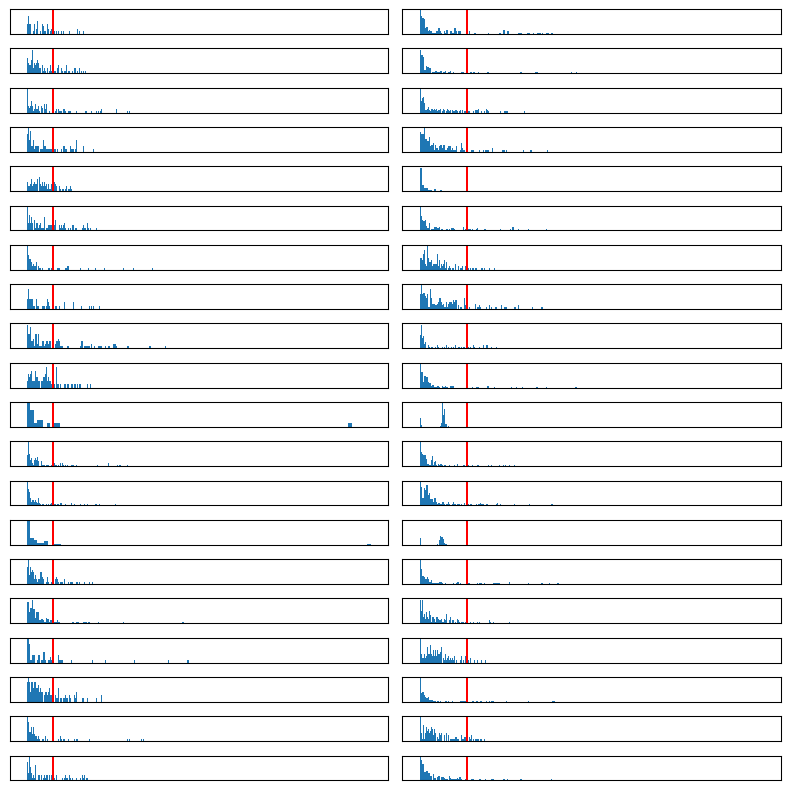

In [9]:
show_factor_distribution(U=model_st.U, V=model_st.V, resolution=100, show_hist=True, show_minmax=True, remove_below=1e-5, us=[model_st.u] * k, vs=[model_st.v] * k)

# Improve `u`, `v` with `BinaryMFThreshold`

[I] k            : 20
[I] U            : (300, 20)
[I] V            : (500, 20)
[I] W            : full
[I] u            : 0.29938050310162523
[I] v            : 0.5348506350885143
[I] lamda        : 10
[I] solver       : line-search
[I] min_diff     : 0.001
[I] max_iter     : 1000
[I] init_method  : custom
[I] normalize_method : None
[I] seed         : 1722759101
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] show_logs    : False
[I] save_model   : False
[I] show_result  : True
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-04 16-11-41-905888 BinaryMFThreshold


[I] F: 2851.2856:   3%|▎         | 31/1000 [00:05<02:55,  5.52it/s]


[W] Stopped in advance: Difference lower than threshold
[I] time elapsed :  5s


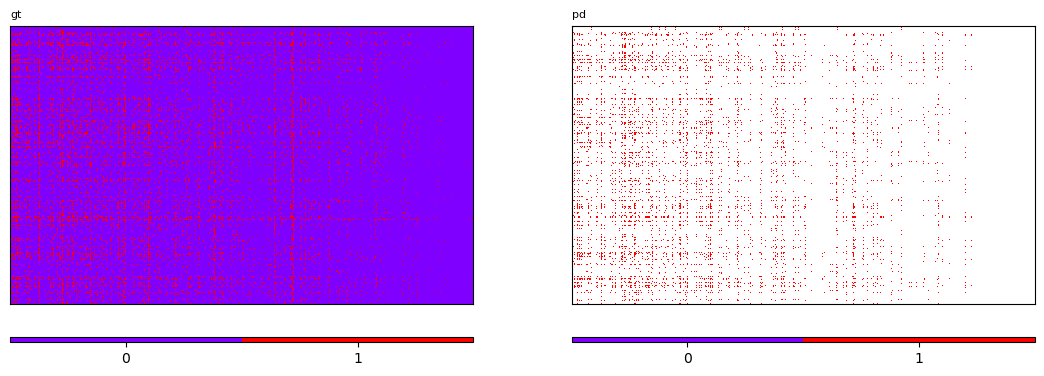

0 - [0.000, 0.642], [0.000, 1.506]
1 - [0.000, 0.671], [0.000, 1.782]
2 - [0.000, 1.169], [0.000, 1.189]
3 - [0.000, 1.082], [0.000, 1.458]
4 - [0.000, 0.536], [0.000, 2.318]
5 - [0.000, 0.798], [0.000, 1.439]
6 - [0.000, 1.430], [0.000, 0.854]
7 - [0.000, 0.825], [0.000, 1.391]
8 - [0.000, 1.576], [0.000, 0.874]
9 - [0.000, 0.727], [0.000, 1.780]
10 - [0.000, 3.676], [0.000, 0.328]
11 - [0.000, 1.144], [0.000, 1.080]
12 - [0.000, 1.005], [0.000, 1.506]
13 - [0.000, 3.892], [0.000, 0.309]
14 - [0.000, 0.749], [0.000, 1.574]
15 - [0.000, 1.777], [0.000, 1.026]
16 - [0.000, 1.831], [0.000, 0.749]
17 - [0.000, 0.913], [0.000, 1.528]
18 - [0.000, 1.329], [0.000, 0.741]
19 - [0.000, 0.762], [0.000, 1.501]


<Figure size 640x480 with 0 Axes>

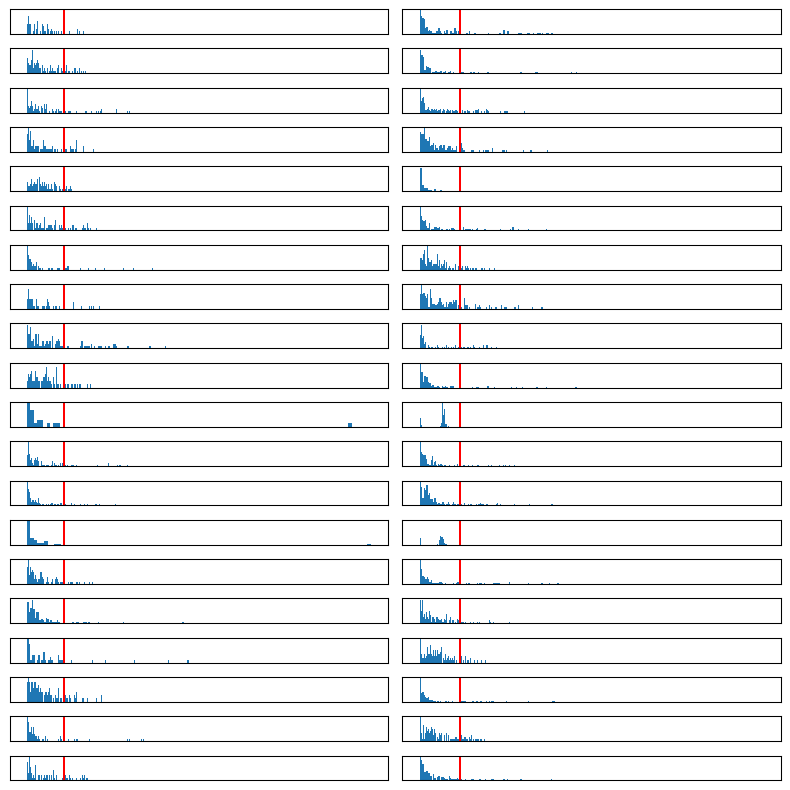

train  \
                                                                    0   
                 time iter         u         v            F    Recall   
0   04/08/24 04:11:41    0  0.299381  0.534851  3155.850603  0.433885   
1   04/08/24 04:11:42    1  0.366141  0.564011  2923.588415  0.339316   
2   04/08/24 04:11:42    2  0.354361  0.540477  2901.315514  0.367491   
3   04/08/24 04:11:42    3  0.387765  0.528822  2891.105491  0.339037   
4   04/08/24 04:11:42    4  0.372497  0.507626  2874.821706  0.367584   
5   04/08/24 04:11:42    5  0.389023  0.507355  2868.346405  0.351683   
6   04/08/24 04:11:42    6  0.384957  0.495427  2863.360136  0.365724   
7   04/08/24 04:11:43    7  0.403418  0.491094  2861.794129  0.349916   
8   04/08/24 04:11:43    8  0.393912  0.478667  2857.424620  0.368514   
9   04/08/24 04:11:43    9  0.404544  0.480707  2855.567289  0.354380   
10  04/08/24 04:11:43   10  0.400649  0.473480  2854.146273  0.367863   
11  04/08/24 04:11:43   11  0.406715  0.473802  2853.306107  0.363958   
12  04/08/24 04:11:43   12  0.405198  0.469358  2852.702627  0.368514   
13  04/08/24 04:11:44   13  0.408804  0.469012  2852.298698  0.366561   
14  04/08/24 04:11:44   14  0.408340  0.466184  2852.010322  0.367584   
15  04/08/24 04:11:44   15  0.412767  0.465077  2851.877578  0.364609   
16  04/08/24 04:11:44   16  0.410584  0.461967  2851.663757  0.366747   
17  04/08/24 04:11:44   17  0.413329  0.462656  2851.540570  0.363493   
18  04/08/24 04:11:44   18  0.412283  0.460773  2851.456698  0.364980   
19  04/08/24 04:11:45   19  0.413902  0.460999  2851.403379  0.363865   
20  04/08/24 04:11:45   20  0.413428  0.459833  2851.366893  0.364237   
21  04/08/24 04:11:45   21  0.414401  0.459847  2851.342344  0.364237   
22  04/08/24 04:11:46   22  0.414212  0.459110  2851.325271  0.365166   
23  04/08/24 04:11:46   23  0.414808  0.459038  2851.313400  0.363772   
24  04/08/24 04:11:46   24  0.414701  0.458086  2851.309942  0.365538   
25  04/08/24 04:11:46   25  0.415501  0.458369  2851.300787  0.365538   
26  04/08/24 04:11:46   26  0.415140  0.457839  2851.294945  0.365538   
27  04/08/24 04:11:46   27  0.415609  0.457961  2851.291287  0.365538   
28  04/08/24 04:11:47   28  0.415432  0.457638  2851.288895  0.365538   
29  04/08/24 04:11:47   29  0.415710  0.457680  2851.287328  0.365538   
30  04/08/24 04:11:47   30  0.415628  0.457480  2851.286273  0.365538   
31  04/08/24 04:11:47   31  0.415796  0.457485  2851.285557  0.365538   

                                  
                                  
   Precision  Accuracy        F1  
0   0.684365  0.945067  0.531072  
1   0.743783  0.944253  0.466028  
2   0.723412  0.944580  0.487390  
3   0.741962  0.944160  0.465407  
4   0.724523  0.944640  0.487724  
5   0.732094  0.944293  0.475126  
6   0.723111  0.944487  0.485765  
7   0.728558  0.944047  0.472768  
8   0.719107  0.944407  0.487304  
9   0.725214  0.944087  0.476107  
10  0.718489  0.944347  0.486593  
11  0.722807  0.944393  0.484136  
12  0.718065  0.944353  0.487064  
13  0.718818  0.944307  0.485528  
14  0.718205  0.944320  0.486284  
15  0.717606  0.944160  0.483537  
16  0.717743  0.944260  0.485445  
17  0.718038  0.944133  0.482652  
18  0.717550  0.944173  0.483851  
19  0.717982  0.944147  0.482967  
20  0.717005  0.944113  0.483073  
21  0.717005  0.944113  0.483073  
22  0.716214  0.944113  0.483710  
23  0.717535  0.944120  0.482784  
24  0.715117  0.944073  0.483786  
25  0.715117  0.944073  0.483786  
26  0.715117  0.944073  0.483786  
27  0.715117  0.944073  0.483786  
28  0.715117  0.944073  0.483786  
29  0.715117  0.944073  0.483786  
30  0.715117  0.944073  0.483786  
31  0.715117  0.944073  0.483786

In [12]:
from PyBMF.models import BinaryMFThreshold

U, V = model_st.U.copy(), model_st.V.copy()

u, v = model_st.u, model_st.v

task = 'reconstruction'
init_method = 'custom'
lamda = 10
solver = 'line-search'

model = BinaryMFThreshold(k=k, U=U, V=V, W=W, u=u, v=v, lamda=lamda, init_method=init_method, max_iter=max_iter, solver=solver, normalize_method=None)
model.fit(X_train=X_train, X_val=None, X_test=None, task=task, verbose=False, display=False, show_logs=False, show_result=True, save_model=False)

show_factor_distribution(U=model.U, V=model.V, resolution=100, show_hist=True, show_minmax=True, remove_below=1e-5, us=[model.u] * model.k, vs=[model.v] * model.k)

display(model.logs['updates'])

# Thresholding manually

Try thresholding manually and see if you can find a better solution than `SimpleThreshold` and `BinaryMFThreshold`!

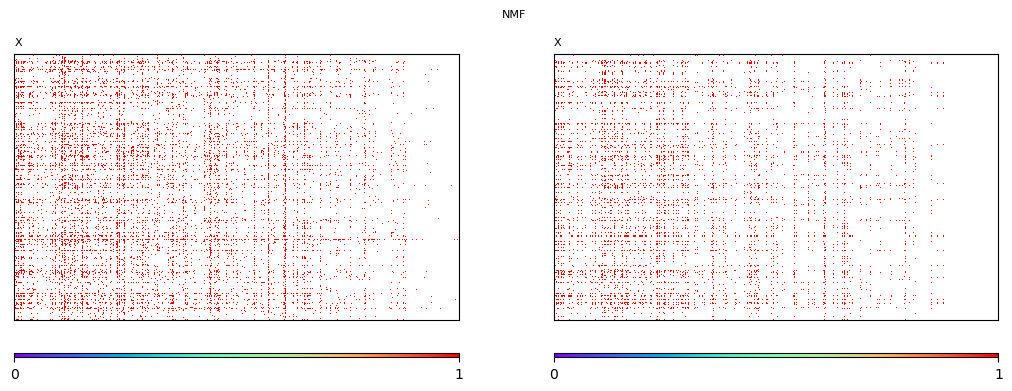

Recall: 0.417612, Precision: 0.678501, Accuracy: 0.944060, F1: 0.517009


<Figure size 640x480 with 0 Axes>

In [14]:
from PyBMF.utils import show_matrix, binarize, to_sparse, eval

# your thresholds
u, v = 0.4, 0.4

# show the results
X = binarize(model_nmf.U, u) @ binarize(model_nmf.V.T, v)
X = binarize(X, 0.5)
X = to_sparse(X)
X.eliminate_zeros()
X_train.eliminate_zeros()
show_matrix([(X_train, [0, 0], 'X'), (X, [0, 1], 'X')], clim=[0, 1], colorbar=True, title='NMF')

# show the distribution of the factor matrices
# show_factor_distribution(model_nmf.U, model_nmf.V, resolution=100, show_minmax=True, show_hist=True, remove_below=1e-5, us=[model.u] * k, vs=[model.v] * k)

# evaluation
rec, prec, acc, f1 = eval(
    metrics=['Recall', 'Precision', 'Accuracy', 'F1'], 
    task='reconstruction', 
    X_gt=X_train, 
    X_pd=X
)
print(f'Recall: {rec:.6f}, Precision: {prec:.6f}, Accuracy: {acc:.6f}, F1: {f1:.6f}')